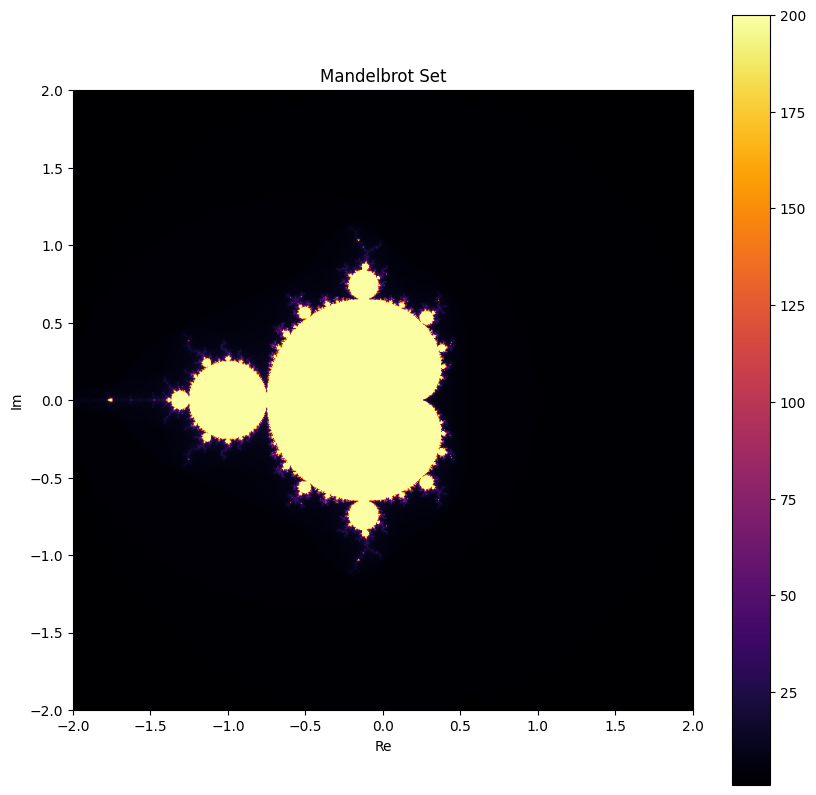

<ipython-input-1-7f59094a7633>:61: RuntimeWarning: divide by zero encountered in log
  counts_log = np.log(counts)


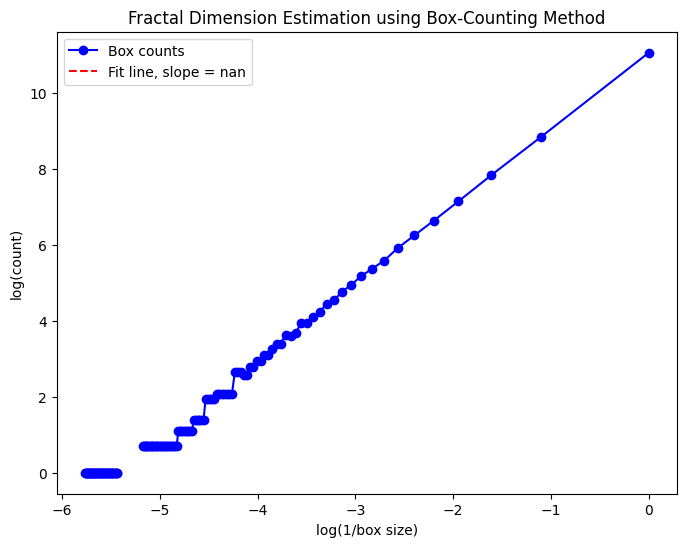

Estimated fractal dimension: nan


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from numba import jit

# Set image parameters
width, height = 800, 800  # image dimensions
zoom_level = 1.0  # zoom level for enhanced fractal detail

@jit
def mandelbrot(c, max_iter):
    """Compute the Mandelbrot fractal value for a given complex point."""
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

def generate_fractal(xmin, xmax, ymin, ymax, width, height, max_iter):
    """Generate the Mandelbrot fractal over a grid of complex points."""
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    fractal = np.zeros((width, height))
    for i in range(width):
        for j in range(height):
            fractal[i, j] = mandelbrot(x[i] + 1j*y[j], max_iter)
    return fractal

def plot_fractal(fractal, title="Mandelbrot Set"):
    """Plot the fractal using matplotlib."""
    plt.figure(figsize=(10, 10))
    plt.imshow(fractal.T, cmap="inferno", extent=(-2, 2, -2, 2))
    plt.colorbar()
    plt.title(title)
    plt.xlabel("Re")
    plt.ylabel("Im")
    plt.show()

# Fractal parameters
xmin, xmax, ymin, ymax = -2.0, 2.0, -2.0, 2.0
max_iter = 200  # Increase for higher detail

# Generate and plot the fractal
fractal = generate_fractal(xmin, xmax, ymin, ymax, width, height, max_iter)
plot_fractal(fractal)

# Box-counting method to calculate fractal dimension
def box_counting(fractal, threshold=50):
    """Calculate fractal dimension using the box-counting method."""
    sizes = []
    counts = []

    for box_size in range(1, min(fractal.shape) // 2, 2):
        zoomed = zoom(fractal, 1 / box_size, order=0)
        count = np.sum(zoomed > threshold)
        sizes.append(1 / box_size)
        counts.append(count)

    sizes_log = np.log(sizes)
    counts_log = np.log(counts)

    # Linear fit for fractal dimension
    fit = np.polyfit(sizes_log, counts_log, 1)
    fractal_dimension = fit[0]

    plt.figure(figsize=(8, 6))
    plt.plot(sizes_log, counts_log, "bo-", label="Box counts")
    plt.plot(sizes_log, np.polyval(fit, sizes_log), "r--", label=f"Fit line, slope = {fractal_dimension:.2f}")
    plt.xlabel("log(1/box size)")
    plt.ylabel("log(count)")
    plt.title("Fractal Dimension Estimation using Box-Counting Method")
    plt.legend()
    plt.show()

    return fractal_dimension

# Calculate and display the fractal dimension
fractal_dim = box_counting(fractal)
print(f"Estimated fractal dimension: {fractal_dim:.2f}")
